In [2]:
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.manifold import TSNE
pd.set_option('display.max_columns', 11)

# Dataset labels

In [3]:
y_columns_to_show = ["pdb_code","chain",'subclass_III_1', 'subclass_III_2', 'subclass_III_3', 'subclass_III_4',
       'subclass_III_5', 'subclass_III_6', 'subclass_IV_1', 'subclass_IV_10',
       'subclass_IV_2', 'subclass_IV_3', 'subclass_IV_4', 'subclass_IV_5',
       'subclass_IV_6', 'subclass_IV_7', 'subclass_IV_8', 'subclass_IV_9',
       'subclass_V_1', 'subclass_V_2', 'subclass_V_3', 'subclass_V_4',
       'subclass_V_5']

In [4]:
y = pd.read_csv("../labels/Y_sets.csv")
print(y.shape)
y[y_columns_to_show].head()

(7225, 28)


pdb_code chain  subclass_III_1  subclass_III_2  subclass_III_3  ...  \
0     1a0r     B             0.0             0.0             0.0  ...   
1     1a0t     P             0.0             0.0             0.0  ...   
2     1a0t     Q             0.0             0.0             0.0  ...   
3     1a12     A             0.0             0.0             0.0  ...   
4     1a12     B             0.0             0.0             0.0  ...   

   subclass_V_1  subclass_V_2  subclass_V_3  subclass_V_4  subclass_V_5  
0           0.0           0.0           0.0           0.0           0.0  
1           0.0           0.0           0.0           0.0           0.0  
2           0.0           0.0           0.0           0.0           0.0  
3           0.0           0.0           0.0           0.0           0.0  
4           0.0           0.0           0.0           0.0           0.0  

[5 rows x 23 columns]

In [5]:
y[y_columns_to_show[-4:]].values.sum(1)>0

array([False, False, False, ..., False, False, False])

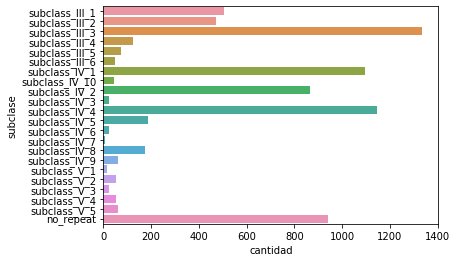

In [6]:
y["no_repeat"] = (y[y_columns_to_show[2:]].sum(1)==0).map(int)
tmp = pd.DataFrame(y[y_columns_to_show[2:]+['no_repeat']].sum()).reset_index().rename(columns={"index":"subclase",0:'cantidad'})
sns.barplot(data=tmp,x="cantidad",y='subclase')

# Dataset XAL/XDL representation

In [7]:
XAL = pickle.load( open( "../labels/XAL.bin", "rb" ) )
XDL = pickle.load( open( "../labels/XDL.bin", "rb" ) )

Equal number of observations:

In [8]:
print("Number of observation labels:", y.shape[0])
print("XAL dimension: ", XAL.shape)
print("XDL dimension: ", XDL.shape)

Number of observation labels: 7225
XAL dimension:  (7225, 12, 12, 5)
XDL dimension:  (7225, 20, 15)


Empty features:

In [9]:
print("XAL # Features w/ var=0: ",(XAL.var(0)<=0.0).sum())
print("XAL % Features w/ var=0: ",(XAL.var(0)<=0.0).sum()/(12*12*5))
print("XDL # Features w/ var=0: ",(XDL.var(0)<=0.0).sum())
print("XDL % Features w/ var=0: ",(XDL.var(0)<=0.0).sum()/(20*15))

XAL # Features w/ var=0:  12
XAL % Features w/ var=0:  0.016666666666666666
XDL # Features w/ var=0:  0
XDL % Features w/ var=0:  0.0


# TSNE Visualization

In [10]:
def ravel_2d(arr):
    dims = ( arr.shape[0], np.array(arr.shape[1:]).prod() )
    return np.reshape(arr,dims)

In [11]:
XAL_embedded = TSNE(n_components=2).fit_transform(ravel_2d(XAL))
XDL_embedded = TSNE(n_components=2).fit_transform(ravel_2d(XDL))

In [39]:
y_columns_to_plot = ["subclass_III_3",'subclass_IV_1', 'subclass_IV_2', 'subclass_IV_4']

In [41]:
y_columns_to_plot = y_columns_to_show[2:]

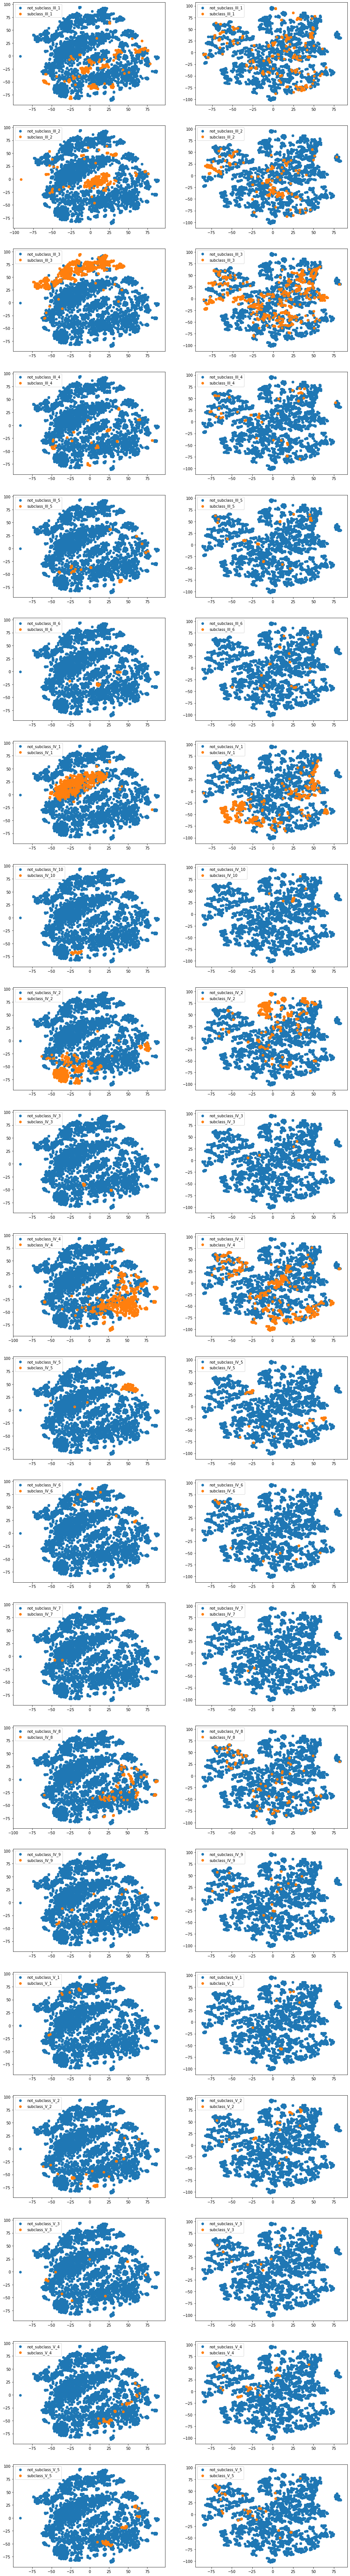

In [42]:
n_plots = len(y_columns_to_plot)
fig = plt.figure(figsize=(16,6*n_plots))
cont = 0
for col in y_columns_to_plot:
    cont+=1
    fig.add_subplot(n_plots,2,cont)
    plt.scatter(XAL_embedded[y[col]==0][:,0], XAL_embedded[y[col]==0][:, 1], label='not_'+col)
    plt.scatter(XAL_embedded[y[col]==1][:,0], XAL_embedded[y[col]==1][:, 1], label=col)
    plt.legend()
    cont+=1
    fig.add_subplot(n_plots,2,cont)
    plt.scatter(XDL_embedded[y[col]==0][:,0], XDL_embedded[y[col]==0][:, 1], label='not_'+col)
    plt.scatter(XDL_embedded[y[col]==1][:,0], XDL_embedded[y[col]==1][:, 1], label=col)
    plt.legend()